In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Bring in the 10 years of sample data
data_file = r"d:\Desktop\Team_4\sample5death05_15.csv"
data_file_pd = pd.read_csv(data_file)
data_df = pd.DataFrame(data_file_pd)
data_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,injury_at_work,manner_of_death,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex
0,0,67,NaN,NaN,NaN,12710949,12710949.0,NaN,NaN,NaN,...,U,7.0,W,U,10,6,NaN,1,1,M
1,1,95,NaN,NaN,NaN,4686059,4686059.0,NaN,NaN,NaN,...,U,7.0,D,C,9,1,NaN,1,1,M
2,2,70,NaN,NaN,NaN,6762380,6762380.0,NaN,NaN,NaN,...,U,7.0,D,C,11,4,NaN,1,1,F
3,3,68,NaN,NaN,NaN,12325960,12325960.0,NaN,NaN,NaN,...,U,7.0,M,B,1,4,NaN,1,1,M
4,4,24,NaN,NaN,NaN,491263,491263.0,NaN,NaN,NaN,...,U,7.0,M,B,4,4,NaN,1,1,M


In [3]:
data_df.columns

Index(['Unnamed: 0', '113_cause_recode', '130_infant_cause_recode',
       '358_cause_recode', '39_cause_recode', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'activity_code', 'age_recode_12', 'age_recode_27', 'age_recode_52',
       'autopsy', 'current_data_year', 'day_of_week_of_death', 'detail_age',
       'detail_age_type', 'education_2003_revision', 'hispanic_origin',
       'hispanic_originrace_recode', 'icd_code_10th_revision',
       'infant_age_recode_22', 'injury_at_work', 'manner_of_death',
       'marital_status', 'method_of_disposition', 'month_of_death',
       'place_of_death_and_decedents_status', 'race_recode_3', 'race_recode_5',
       'resident_status', 'sex'],
      dtype='object')

In [4]:
# Bring in the 113 code data
cause_code_df = pd.read_csv(r"d:\Desktop\Team_4\113_recode.csv", header = None, 
                      names=['113_cause_recode', 'cause_group'] )
cause_code_df.head()

,113_cause_recode,cause_group
0,1,Salmonella infections (A01-A02)
1,2,"Shigellosis and amebiasis (A03,A06)"
2,3,"Certain other intestinal infections (A04,A07-A09)"
3,4,1 Tuberculosis (A16-A19)
4,5,Respiratory tuberculosis (A16)


In [5]:
cause_code_df.dtypes

113_cause_recode     int64
cause_group         object
dtype: object

In [6]:
cause_code_df["113_cause_recode"] = pd.to_numeric(cause_code_df["113_cause_recode"])

In [7]:
# Merge the first two files
cause_code_merge_df = data_df.merge(cause_code_df, on='113_cause_recode', how='left')
cause_code_merge_df.head()

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,manner_of_death,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group
0,0,67,NaN,NaN,NaN,12710949,12710949.0,NaN,NaN,NaN,...,7.0,W,U,10,6,NaN,1,1,M,Heart failure (I50)
1,1,95,NaN,NaN,NaN,4686059,4686059.0,NaN,NaN,NaN,...,7.0,D,C,9,1,NaN,1,1,M,Other chronic liver disease and cirrhosis (K73...
2,2,70,NaN,NaN,NaN,6762380,6762380.0,NaN,NaN,NaN,...,7.0,D,C,11,4,NaN,1,1,F,Cerebrovascular diseases (I60-I69)
3,3,68,NaN,NaN,NaN,12325960,12325960.0,NaN,NaN,NaN,...,7.0,M,B,1,4,NaN,1,1,M,"All other forms of heart disease (I26-I28,I34-..."
4,4,24,NaN,NaN,NaN,491263,491263.0,NaN,NaN,NaN,...,7.0,M,B,4,4,NaN,1,1,M,Malignant neoplasms of liver and intrahepatic ...


In [8]:
# Create dictionaries/dataframes for the columns with codes

# Place of Death
place_of_death_dct = {'place_of_death_and_decedents_status': [1,2,3,4,5,6,7,9],
                      'place': ['Hospital, clinic or Medical Center – Inpatient', 
                                'Hospital, Clinic or Medical Center - Outpatient or admitted to Emergency Room', 
                                'Hospital, Clinic or Medical Center - Dead on Arrival',"Decedent’s home", 
                                'Hospice facility', 'Nursing home/long term care', 'Other', 'Place of death unknown']}
place_df = pd.DataFrame(place_of_death_dct)

# Marital Status
marital_status_dct = {'marital_status':['S','M','W','D','U'], 
                      'marital':['Never married, single','Married','Widowed','Divorced',
                                        'Marital Status unknown']}
marital_df = pd.DataFrame(marital_status_dct)

# Month of Death
month_dct = {'month_of_death':[1,2,3,4,5,6,7,8,9,10,11,12],
             'month':['January','February','March','April','May','June','July','August','September',
                      'October','November','December']}
month_df = pd.DataFrame(month_dct)

# Method of Disposition
disposition_dct = {'method_of_disposition':['B','C','D','U'],
                   'disposition':['Burial','Cremation','Other','Unknown']}
disp_df = pd.DataFrame(disposition_dct)

# Education
edu_dct = {'education_2003_revision': [1,2,3,4,5,6,7,8,9],
           'education':['8th grade or less','9 - 12th grade, no diploma','high school graduate or GED completed',
                        'some college credit, but no degree','Associate degree','Bachelor’s degree',
                        "Master’s degree",'Doctorate or professional degree','Unknown']}
edu_df = pd.DataFrame(edu_dct)

# Day of the Week
day_of_week_dct = {'day_of_week_of_death': [1,2,3,4,5,6,7,9], 
                   'day_of_week':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Unknown']}
day_df = pd.DataFrame(day_of_week_dct)

# Age Range
age_code_dct = {'age_recode_12': [1,2,3,4,5,6,7,8,9,10,11,12],
                 'age_range': ["Under 1 year (includes not stated infant ages)","1 - 4 years", "5 - 14 years",
                               "15 - 24 years", "25 - 34 years","35 - 44 years","45 - 54 years","55 - 64 years",
                               "65 - 74 years","75 - 84 years","85 years and over","Age not stated"]}
age_code_df = pd.DataFrame(age_code_dct)

# Manner of Death
cause_dct = {"manner_of_death": [1,2,3,4,5,6,7,None],
              "cause_of_death": ["Accident", "Suicide","Homicide","Pending investigation","Could not determine",
                                 "Self-Inflicted", "Natural", "Not specified"]}
cause_df = pd.DataFrame(cause_dct)

In [9]:
# Merge the dataframes with the main dataframe
merge1_df = cause_code_merge_df.merge(place_df, on='place_of_death_and_decedents_status', how='left')
merge2_df = merge1_df.merge(marital_df, on='marital_status', how='left')
merge3_df = merge2_df.merge(month_df, on='month_of_death', how='left')
merge4_df = merge3_df.merge(disp_df, on='method_of_disposition', how='left')
merge5_df = merge4_df.merge(edu_df, on='education_2003_revision', how='left')
merge6_df = merge5_df.merge(day_df, on='day_of_week_of_death', how='left')
merge7_df = merge6_df.merge(age_code_df, on='age_recode_12', how= 'left')
merge8_df = merge7_df.merge(cause_df, on='manner_of_death', how='left')

## Alzheimer's filter

In [10]:
total_merge_df_rows = merge1_df["manner_of_death"].count()
total_merge_df_rows

1103324

In [11]:
merge1_df.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
0,0,67,NaN,NaN,NaN,12710949,12710949.0,NaN,NaN,NaN,...,W,U,10,6,NaN,1,1,M,Heart failure (I50),Nursing home/long term care


In [12]:
#filter for Alzheimer's, 113_cause recode: 52
filter_death_alz = merge1_df[merge1_df["113_cause_recode"]==52]
filter_death_alz.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
126,126,52,NaN,NaN,NaN,2652309,2652309.0,NaN,NaN,NaN,...,W,B,3,6,NaN,1,1,F,Alzheimer's disease (G30),Nursing home/long term care


In [13]:
# group Alzheimer's data by year
gb_year_alz = filter_death_alz.groupby("current_data_year")

In [14]:
# count the number of Alzheimer's deaths per year
alz_total_year = gb_year_alz["113_cause_recode"].count()
alz_total_year

current_data_year
2005    3555
2006    3698
2007    3614
2008    4074
2009    4052
2010    4146
2011    4197
2012    4145
2013    4271
2014    4626
2015    5575
Name: 113_cause_recode, dtype: int64

In [15]:
# filter Alzheimer's death df by men
filter_death_alz_men = filter_death_alz[filter_death_alz["sex"]=="M"]
filter_death_alz_men.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
300,300,52,NaN,NaN,NaN,11523678,11523678.0,NaN,NaN,NaN,...,M,C,6,4,NaN,1,1,M,Alzheimer's disease (G30),Decedent’s home


In [16]:
# group Alzheimer's men's data by year
gb_year_alz_men = filter_death_alz_men.groupby("current_data_year")

In [17]:
# count the number of Alzheimer's men's deaths per year
alz_total_year_men = gb_year_alz_men["113_cause_recode"].count()
alz_total_year_men.head()

current_data_year
2005    1045
2006    1110
2007    1063
2008    1185
2009    1202
Name: 113_cause_recode, dtype: int64

In [18]:
# filter Alzheimer's death df by women
filter_death_alz_women = filter_death_alz[filter_death_alz["sex"]=="F"]
filter_death_alz_women.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
126,126,52,NaN,NaN,NaN,2652309,2652309.0,NaN,NaN,NaN,...,W,B,3,6,NaN,1,1,F,Alzheimer's disease (G30),Nursing home/long term care


In [19]:
# group Alzheimer's women's data by year
gb_year_alz_women = filter_death_alz_women.groupby("current_data_year")

In [20]:
# count the number of Alzheimer's women's deaths per year
alz_total_year_women = gb_year_alz_women["113_cause_recode"].count()
alz_total_year_women.head()

current_data_year
2005    2510
2006    2588
2007    2551
2008    2889
2009    2850
Name: 113_cause_recode, dtype: int64

## Diabetes filter

In [21]:
#filter for diabetes, 113_cause recode: 46
filter_death_dia = merge1_df[merge1_df["113_cause_recode"]==46]
filter_death_dia.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
15,15,46,NaN,NaN,NaN,7633404,7633404.0,NaN,NaN,NaN,...,W,B,3,1,NaN,1,1,F,3 Diabetes mellitus (E10-E14),"Hospital, clinic or Medical Center – Inpatient"


In [22]:
# group diabetes deaths by year
gb_year_dia = filter_death_dia.groupby("current_data_year")

In [23]:
# number of diabetes deaths per year
dia_total_year = gb_year_dia["113_cause_recode"].count()
dia_total_year

current_data_year
2005    3751
2006    3568
2007    3596
2008    3465
2009    3456
2010    3331
2011    3679
2012    3737
2013    3868
2014    3865
2015    3983
Name: 113_cause_recode, dtype: int64

## Alzheimer's-Diabetes Line Graph

In [24]:
# Dependencies
import matplotlib.pyplot as plt

In [25]:
# Set x axis to years in data
x_axis = np.arange(2005,2016,1)
x_axis

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [26]:
# assign series totals to y-axis variables
points_alz = alz_total_year
points_dia = dia_total_year

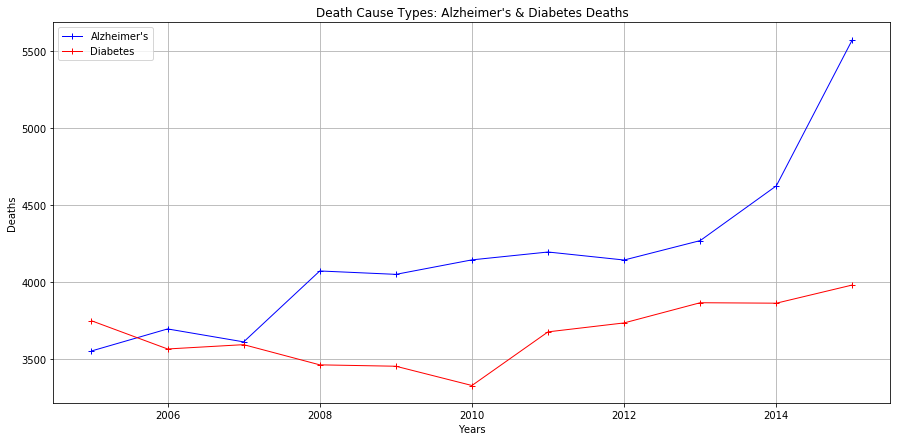

In [27]:
# Create a handle for each plot
plt.figure(figsize=(15,7))
alzheimer, = plt.plot(x_axis, points_alz, marker="+",color="blue", linewidth=1, label="Alzheimer's")
#diabetes, = plt.plot(x_axis, points_dia, marker="s", color="Red", linewidth=1, label="Diabetes")
diabetes, = plt.plot(x_axis, points_dia, marker="+", color="Red", linewidth=1, label="Diabetes")
# Set our legend to where the chart thinks is best
plt.legend(handles=[alzheimer, diabetes], loc="best")
# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.title("Death Cause Types: Alzheimer's & Diabetes Deaths")
plt.grid()

In [28]:
# plot Alzheimer's total along with sub-filters based on sex
points_alz_men = alz_total_year_men
points_alz_women = alz_total_year_women

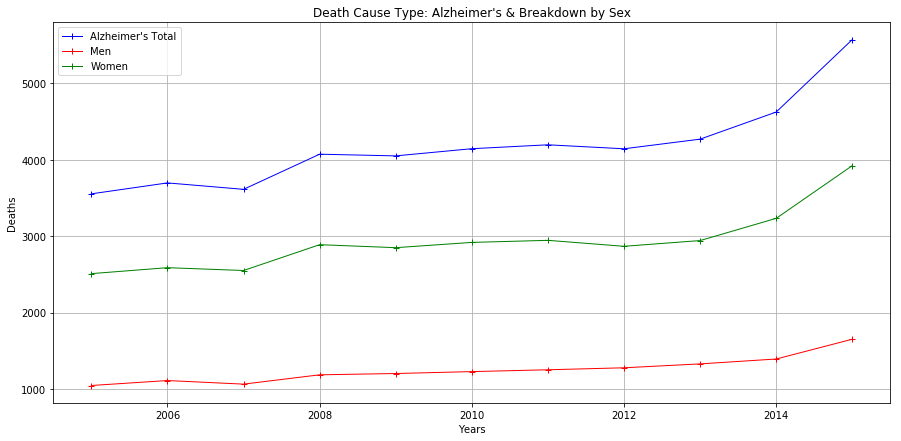

In [29]:
# Create a handle for each plot
plt.figure(figsize=(15,7))
alzheimer, = plt.plot(x_axis, points_alz, marker="+",color="blue", linewidth=1, label="Alzheimer's Total")
alzheimer_men, = plt.plot(x_axis, points_alz_men, marker="+", color="red", linewidth=1, label="Men")
alzheimer_women, = plt.plot(x_axis, points_alz_women, marker="+", color="green", linewidth=1, label="Women")
# Set our legend to where the chart thinks is best
plt.legend(handles=[alzheimer, alzheimer_men, alzheimer_women], loc="best")
# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.title("Death Cause Type: Alzheimer's & Breakdown by Sex")
plt.grid()

## Ischemic Heart Disease Filter

In [30]:
#filter for Heart, 113_cause recode: 63 - chronic ischemic heart disease
filter_death_heart_isc = merge1_df[merge1_df["113_cause_recode"]==63]
filter_death_heart_isc.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
24,24,63,NaN,NaN,NaN,8790268,8790268.0,NaN,NaN,NaN,...,D,C,10,4,NaN,1,1,M,All other forms of chronic ischemic heart dise...,Decedent’s home


In [31]:
# group heart ischemic (blood flow) deaths by year
gb_heart_isc = filter_death_heart_isc.groupby("current_data_year")

In [32]:
# number of diabetes deaths per year
isc_total_year = gb_heart_isc["113_cause_recode"].count()
isc_total_year

current_data_year
2005    11429
2006    10895
2007    10415
2008    10565
2009     9902
2010     9708
2011     9685
2012     9551
2013     9475
2014     9404
2015     9354
Name: 113_cause_recode, dtype: int64

## Stroke filter

In [33]:
#filter for Stroke, 113_cause recode: 70
filter_death_stroke = merge1_df[merge1_df["113_cause_recode"]==70]
filter_death_stroke.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
2,2,70,NaN,NaN,NaN,6762380,6762380.0,NaN,NaN,NaN,...,D,C,11,4,NaN,1,1,F,Cerebrovascular diseases (I60-I69),Decedent’s home


In [34]:
# group stroke deaths by year
gb_stroke = filter_death_stroke.groupby("current_data_year")

In [35]:
# number of stroke deaths per year
stroke_total_year = gb_stroke["113_cause_recode"].count()
stroke_total_year

current_data_year
2005    7019
2006    6885
2007    6639
2008    6718
2009    6533
2010    6542
2011    6374
2012    6399
2013    6459
2014    6757
2015    7107
Name: 113_cause_recode, dtype: int64

## Heart Attack filter

In [36]:
#filter for Heart Attack, 113_cause recode: 59
filter_heart_attack = merge1_df[merge1_df["113_cause_recode"]==59]
filter_heart_attack.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
14,14,59,NaN,NaN,NaN,7777005,7777005.0,NaN,NaN,NaN,...,S,B,5,2,NaN,4,1,M,Acute myocardial infarction (I21-I22),"Hospital, Clinic or Medical Center - Outpatien..."


In [37]:
# group heart attacks by year
gb_heart_attack = filter_heart_attack.groupby("current_data_year")

In [38]:
# number of stroke deaths per year
heart_attack_total_year = gb_heart_attack["113_cause_recode"].count()
heart_attack_total_year

current_data_year
2005    7600
2006    7008
2007    6794
2008    6737
2009    6262
2010    6005
2011    5958
2012    5847
2013    6044
2014    5698
2015    5610
Name: 113_cause_recode, dtype: int64

## Heart Disease Other Filter

In [39]:
#filter for Heart Disease Other, 113_cause recode: 68
filter_heart_disease = merge1_df[merge1_df["113_cause_recode"]==68]
filter_heart_disease.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,marital_status,method_of_disposition,month_of_death,place_of_death_and_decedents_status,race_recode_3,race_recode_5,resident_status,sex,cause_group,place
3,3,68,NaN,NaN,NaN,12325960,12325960.0,NaN,NaN,NaN,...,M,B,1,4,NaN,1,1,M,"All other forms of heart disease (I26-I28,I34-...",Decedent’s home


In [40]:
# group heart disease other by year
gb_heart_disease = filter_heart_disease.groupby("current_data_year")

In [41]:
# number of heart disease other deaths per year
heart_disease_total_year = gb_heart_disease["113_cause_recode"].count()
heart_disease_total_year

current_data_year
2005    5625
2006    5345
2007    5753
2008    5658
2009    5933
2010    5885
2011    6018
2012    6182
2013    6555
2014    6708
2015    6983
Name: 113_cause_recode, dtype: int64

## ## Heart-Stroke-Alzheimer's Graph

In [42]:
# assign additional top ten series totals to y-axis variables
points_isc = isc_total_year
points_stroke = stroke_total_year
points_heart_att = heart_attack_total_year
points_heart_dis = heart_disease_total_year

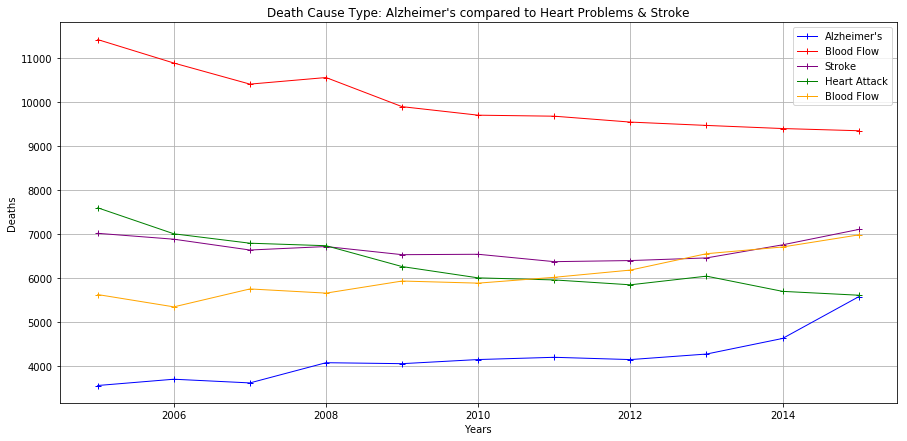

In [43]:
# Create a handle for each plot
plt.figure(figsize=(15,7))
alzheimer, = plt.plot(x_axis, points_alz, marker="+",color="blue", linewidth=1, label="Alzheimer's")
heart_isc, = plt.plot(x_axis, points_isc, marker="+", color="red", linewidth=1, label="Blood Flow")
stroke, = plt.plot(x_axis, points_stroke, marker="+", color="purple", linewidth=1, label="Stroke")
heart_att, = plt.plot(x_axis, points_heart_att, marker="+", color="green", linewidth=1, label="Heart Attack")
heart_dis, = plt.plot(x_axis, points_heart_dis, marker="+", color="orange", linewidth=1, label="Blood Flow")
# Set our legend to where the chart thinks is best
plt.legend(handles=[alzheimer, heart_isc, stroke, heart_att, heart_dis], loc="best")
#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.title("Death Cause Type: Alzheimer's compared to Heart Problems & Stroke")
plt.grid()

## Alzheimer's Blood Flow & Stroke Graph

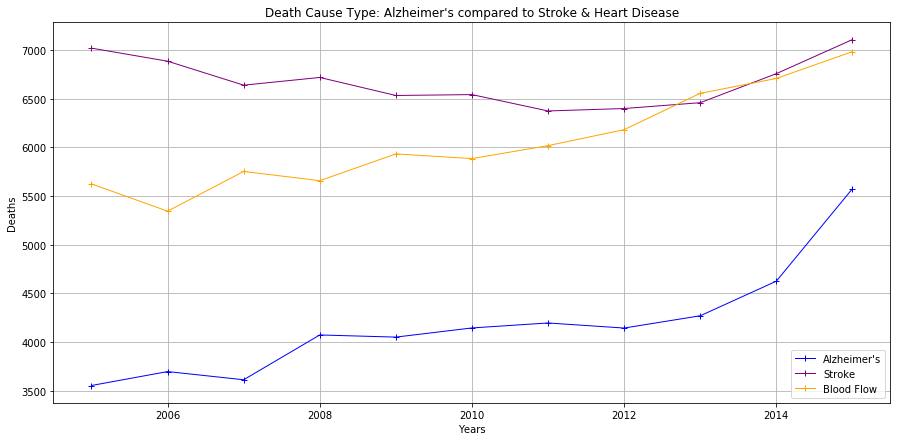

In [44]:
# Create a handle for each plot
plt.figure(figsize=(15,7))
alzheimer, = plt.plot(x_axis, points_alz, marker="+",color="blue", linewidth=1, label="Alzheimer's")
stroke, = plt.plot(x_axis, points_stroke, marker="+", color="purple", linewidth=1, label="Stroke")
heart_dis, = plt.plot(x_axis, points_heart_dis, marker="+", color="orange", linewidth=1, label="Blood Flow")
# Set our legend to where the chart thinks is best
plt.legend(handles=[alzheimer, stroke, heart_dis], loc="best")
# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.title("Death Cause Type: Alzheimer's compared to Stroke & Heart Disease")
plt.grid()

## Method of Death

In [45]:
# groupby death cause
gb_death_method = merge8_df.groupby("manner_of_death")

In [46]:
death_method_count = gb_death_method["current_data_year"].count()
death_method_count

manner_of_death
1.0     67608
2.0     21276
3.0     10229
4.0      2758
5.0      6074
7.0    995379
Name: current_data_year, dtype: int64

In [47]:
percent_death_method = death_method_count/total_merge_df_rows
percent_death_method

manner_of_death
1.0    0.061277
2.0    0.019284
3.0    0.009271
4.0    0.002500
5.0    0.005505
7.0    0.902164
Name: current_data_year, dtype: float64

In [48]:
# manner_of_death classifications
death_methods = merge8_df["cause_of_death"].unique()
death_methods

array(['Natural', 'Homicide', 'Accident', 'Not specified', 'Suicide',
       'Could not determine', 'Pending investigation'], dtype=object)

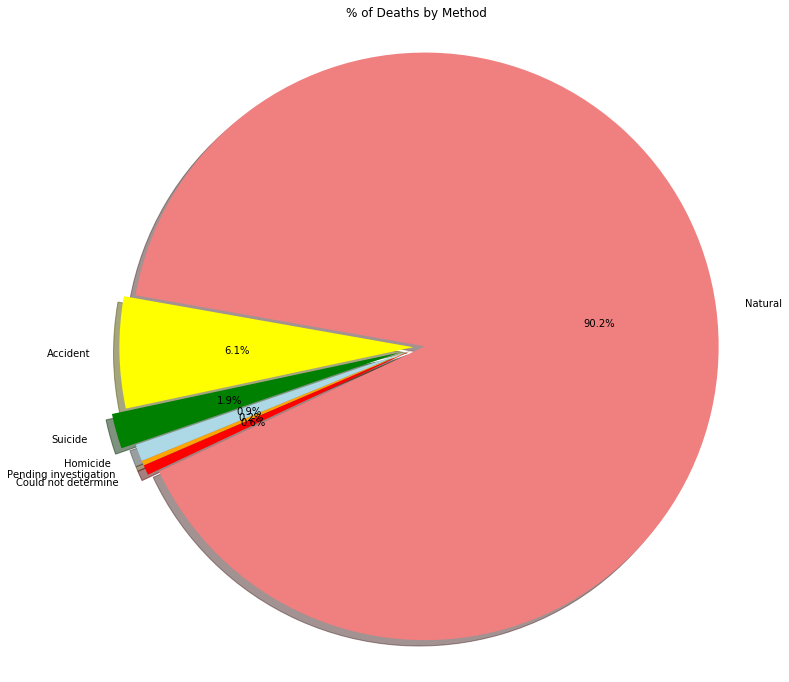

In [49]:
# pie chart based on manner of death
plt.figure(figsize=(12,12))
explode = (0.02,0.07,0.02,0.02,0.02,0.02)
methods = ["Accident","Suicide","Homicide","Pending investigation","Could not determine","Natural"]
colors = ["yellow","green","lightblue","orange","red","lightcoral","yellowgreen","pink"]
plt.pie(percent_death_method,labels=methods,explode=explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Deaths by Method")
plt.axis("scaled")
plt.show()

Text(0, 0.5, 'Deaths')

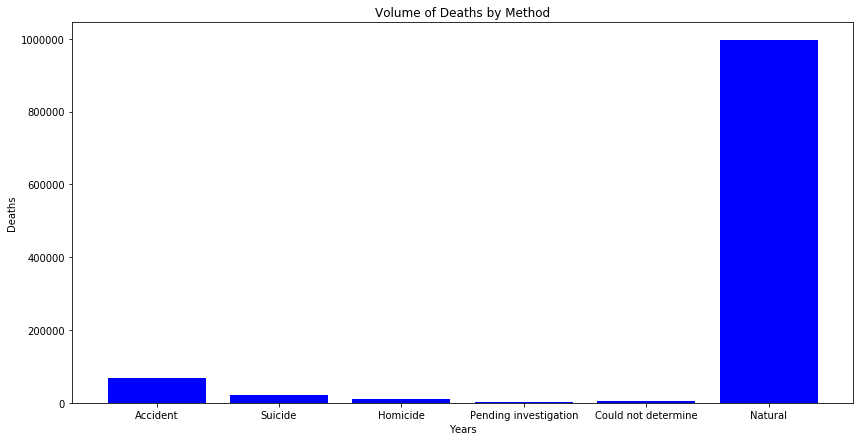

In [50]:
# bar chart by method
plt.figure(figsize=(14,7))
x_axis = np.arange(len(death_method_count))
plt.bar(x_axis,death_method_count, color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,methods)
plt.title("Volume of Deaths by Method")
plt.xlabel("Years")
plt.ylabel("Deaths")

## Method of death: Suicide filter

In [51]:
#filter for Suicide, method_of_death code: 68
filter_suicide = merge8_df[merge8_df["manner_of_death"]==2]
filter_suicide.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,sex,cause_group,place,marital,month,disposition,education,day_of_week,age_range,cause_of_death
20,20,126,NaN,NaN,NaN,3322213,3322213.0,9.0,NaN,NaN,...,M,1 Intentional self-harm (suicide) by other and...,Decedent’s home,"Never married, single",February,Cremation,8th grade or less,Friday,NaN,Suicide


In [52]:
# determine total number of suicides
suicide_method_count = filter_suicide["113_cause_recode"].count()
suicide_method_count

21276

In [53]:
# group suicides by 113_cause_recode classification
gb_suicide_cause = filter_suicide.groupby("cause_group")

## Suicides by cause_group

In [54]:
suicide_cause_count = gb_suicide_cause["cause_group"].count()
suicide_cause_count

cause_group
1 Intentional self-harm (suicide) by discharge of firearms (X72-X74)                                                                    10703
1 Intentional self-harm (suicide) by other and unspecified means and their sequelae (*U03,X60-X71,X75-X84,Y87.0)                        10451
1 Malignant neoplasm of prostate (C61)                                                                                                      1
2 Malignant neoplasm of cervix uteri (C53)                                                                                                  2
3 Diabetes mellitus (E10-E14)                                                                                                               2
3 Septicemia (A40-A41)                                                                                                                      4
Accidental discharge of firearms (W32-W34)                                                                                              

In [55]:
# suicides by sex
suicide_sex_count = filter_suicide["sex"].value_counts()
suicide_sex_count

M    16596
F     4680
Name: sex, dtype: int64

In [56]:
# calc percent by sex
suicide_sex_percent = suicide_sex_count/suicide_method_count
suicide_sex_percent

M    0.780034
F    0.219966
Name: sex, dtype: float64

## Filter: Suicide

In [57]:
merge5_df.columns

Index(['Unnamed: 0', '113_cause_recode', '130_infant_cause_recode',
       '358_cause_recode', '39_cause_recode', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'activity_code', 'age_recode_12', 'age_recode_27', 'age_recode_52',
       'autopsy', 'current_data_year', 'day_of_week_of_death', 'detail_age',
       'detail_age_type', 'education_2003_revision', 'hispanic_origin',
       'hispanic_originrace_recode', 'icd_code_10th_revision',
       'infant_age_recode_22', 'injury_at_work', 'manner_of_death',
       'marital_status', 'method_of_disposition', 'month_of_death',
       'place_of_death_and_decedents_status', 'race_recode_3', 'race_recode_5',
       'resident_status', 'sex', 'cause_group', 'place', 'marital', 'month',
       'disposition', 'education'],
      dtype='object')

In [58]:
# group suicides by 113_cause_recode classification
filter_suicide_ed = merge5_df[merge5_df["manner_of_death"]==2]
filter_suicide_ed.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,race_recode_3,race_recode_5,resident_status,sex,cause_group,place,marital,month,disposition,education
20,20,126,NaN,NaN,NaN,3322213,3322213.0,9.0,NaN,NaN,...,NaN,2,1,M,1 Intentional self-harm (suicide) by other and...,Decedent’s home,"Never married, single",February,Cremation,8th grade or less


In [59]:
gb_suicide_ed = filter_suicide_ed.groupby("education")

In [60]:
suicide_ed_count = gb_suicide_ed["education"].count()
suicide_ed_count

education
8th grade or less                         655
9 - 12th grade, no diploma               1870
Associate degree                         1000
Bachelor’s degree                        1764
Doctorate or professional degree          296
Master’s degree                           606
Unknown                                   479
high school graduate or GED completed    5864
some college credit, but no degree       2629
Name: education, dtype: int64

In [61]:
suicide_ed_percent = suicide_ed_count/suicide_method_count
suicide_ed_percent

education
8th grade or less                        0.030786
9 - 12th grade, no diploma               0.087892
Associate degree                         0.047001
Bachelor’s degree                        0.082910
Doctorate or professional degree         0.013912
Master’s degree                          0.028483
Unknown                                  0.022514
high school graduate or GED completed    0.275616
some college credit, but no degree       0.123566
Name: education, dtype: float64

Text(0, 0.5, 'Deaths')

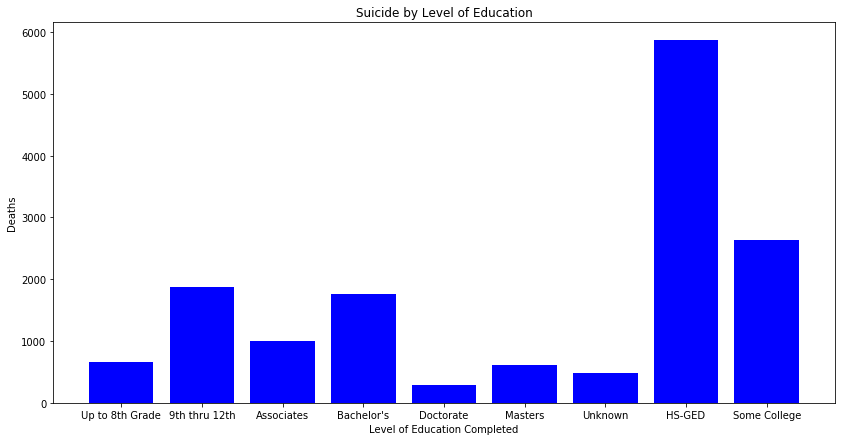

In [62]:
# suicide by education bar chart
plt.figure(figsize=(14,7))
education = ["Up to 8th Grade","9th thru 12th","Associates","Bachelor's","Doctorate","Masters","Unknown","HS-GED","Some College"]
x_axis = np.arange(len(suicide_ed_count))
plt.bar(x_axis,suicide_ed_count, color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,education)
plt.title("Suicide by Level of Education")
plt.xlabel("Level of Education Completed")
plt.ylabel("Deaths")
#plt.grid()

## Suicide by Education totals

In [63]:
# Annual deaths by level of education
gb_suicide_ed_year = filter_suicide_ed.groupby("current_data_year")

In [64]:
# count the number of suicide deaths per year
suicide_ed_total_year = gb_suicide_ed_year["113_cause_recode"].count()
suicide_ed_total_year

current_data_year
2005    1642
2006    1720
2007    1761
2008    1762
2009    1931
2010    1888
2011    2057
2012    2027
2013    2051
2014    2144
2015    2293
Name: 113_cause_recode, dtype: int64

## Filter: Suicide, Education, Grade 8 or less

In [65]:
#filter for grade 8 or less deaths, education_2003_revision code: 1
filter_grade8_less = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==1]

In [66]:
# group grade 8 filter deaths by year
gb_grade8_less = filter_grade8_less.groupby("current_data_year")

In [67]:
# number of grade 8 or less deaths per year
total_grade8_deaths_year = gb_grade8_less["education_2003_revision"].count()
total_grade8_deaths_year

current_data_year
2005    34
2006    42
2007    45
2008    48
2009    53
2010    50
2011    65
2012    82
2013    68
2014    88
2015    80
Name: education_2003_revision, dtype: int64

## Filter: Suicide, Education, 9th thru 12th

In [68]:
#filter for 9th - 12th grade deaths, education_2003_revision code: 2
filter_9_12 = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==2]

In [69]:
# group 9th thru 12th deaths filter by year
gb_9_12_year = filter_9_12.groupby("current_data_year")

In [70]:
# number of 9th thru 12th deaths per year
total_9_12_deaths_year = gb_9_12_year["education_2003_revision"].count()
total_9_12_deaths_year

current_data_year
2005    103
2006    135
2007    117
2008    126
2009    155
2010    162
2011    187
2012    187
2013    193
2014    233
2015    272
Name: education_2003_revision, dtype: int64

## Filter: Suicide, Education, HS-GED

In [71]:
#filter for HS-GED deaths, education_2003_revision code: 3
filter_hs_ged = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==3]

In [72]:
# group HS-GED deaths filter by year
gb_hs_ged_year = filter_hs_ged.groupby("current_data_year")

In [73]:
# number of HS-GED deaths per year
total_hs_ged_year = gb_hs_ged_year["education_2003_revision"].count()
total_hs_ged_year

current_data_year
2005    218
2006    303
2007    343
2008    421
2009    455
2010    530
2011    589
2012    654
2013    724
2014    761
2015    866
Name: education_2003_revision, dtype: int64

## Filter: Suicide, Education, some college

In [74]:
#filter for some college deaths, education_2003_revision code: 4
filter_some_coll = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==4]

In [75]:
# group some coll deaths filter by year
gb_some_coll_year = filter_some_coll.groupby("current_data_year")

In [76]:
# number of some coll deaths per year
total_some_coll_year = gb_some_coll_year["education_2003_revision"].count()
total_some_coll_year

current_data_year
2005    113
2006    149
2007    138
2008    184
2009    232
2010    224
2011    255
2012    297
2013    298
2014    344
2015    395
Name: education_2003_revision, dtype: int64

## Filter: Suicide, Education, Associate

In [77]:
#filter for associate deaths, education_2003_revision code: 5
filter_associate = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==5]

In [78]:
# group associate deaths by year
gb_associate_year = filter_associate.groupby("current_data_year")

In [79]:
# number of associate deaths per year
total_associate_year = gb_associate_year["education_2003_revision"].count()
total_associate_year

current_data_year
2005     24
2006     38
2007     66
2008     65
2009     80
2010     93
2011    101
2012    120
2013    105
2014    141
2015    167
Name: education_2003_revision, dtype: int64

## Filter: Suicide, Education, Bachelor

In [80]:
#filter for bachelor deaths, education_2003_revision code: 6
filter_bachelor = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==6]

In [81]:
# group bachelor deaths by year
gb_bachelor_year = filter_bachelor.groupby("current_data_year")

In [82]:
# number of bachelor deaths per year
total_bachelor_year = gb_bachelor_year["education_2003_revision"].count()
total_bachelor_year

current_data_year
2005     67
2006    106
2007     89
2008    120
2009    138
2010    161
2011    172
2012    193
2013    212
2014    230
2015    276
Name: education_2003_revision, dtype: int64

## Filter: Suicide, Education, Master

In [83]:
#filter for Master's deaths, education_2003_revision code: 7
filter_master = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==7]

In [84]:
# group Master's deaths by year
gb_master_year = filter_master.groupby("current_data_year")

In [85]:
# number of Master's deaths per year
total_master_year = gb_master_year["education_2003_revision"].count()
total_master_year

current_data_year
2005    29
2006    20
2007    39
2008    47
2009    46
2010    51
2011    60
2012    62
2013    83
2014    92
2015    77
Name: education_2003_revision, dtype: int64

## Filter: Suicide, Education, Doctor

In [86]:
#filter for Doctor's deaths, education_2003_revision code: 8
filter_doctor = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==8]

In [87]:
# group Doctor's deaths by year
gb_doctor_year = filter_doctor.groupby("current_data_year")

In [88]:
# number of Doctor's deaths per year
total_doctor_year = gb_doctor_year["education_2003_revision"].count()
total_doctor_year

current_data_year
2005     8
2006    17
2007    25
2008    24
2009    20
2010    39
2011    32
2012    35
2013    31
2014    24
2015    41
Name: education_2003_revision, dtype: int64

## ## Filter: Suicide, Education, unknown

In [89]:
#filter for unknown edu deaths, education_2003_revision code: 9
filter_unknown = filter_suicide_ed[filter_suicide_ed["education_2003_revision"]==9]

In [90]:
# group unknown edu deaths by year
gb_unknown_year = filter_unknown.groupby("current_data_year")

In [91]:
# number of unknown edu deaths per year
total_unknown_year = gb_unknown_year["education_2003_revision"].count()
total_unknown_year

current_data_year
2005    14
2006    24
2007    38
2008    94
2009    79
2010    36
2011    31
2012    32
2013    23
2014    42
2015    66
Name: education_2003_revision, dtype: int64

## Suicide by education graph

In [92]:
# Set x axis to years in data
edu_x_axis = np.arange(2005,2016,1)
edu_x_axis

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [93]:
# assign additional edu totals to y-axis variables
points_ed_tot = suicide_ed_total_year
points_9_12 = total_9_12_deaths_year
points_hs_ged = total_hs_ged_year
points_some = total_some_coll_year
points_associate = total_associate_year
points_bachelor = total_bachelor_year
points_master = total_master_year
points_doctor = total_doctor_year
points_unknown = total_unknown_year

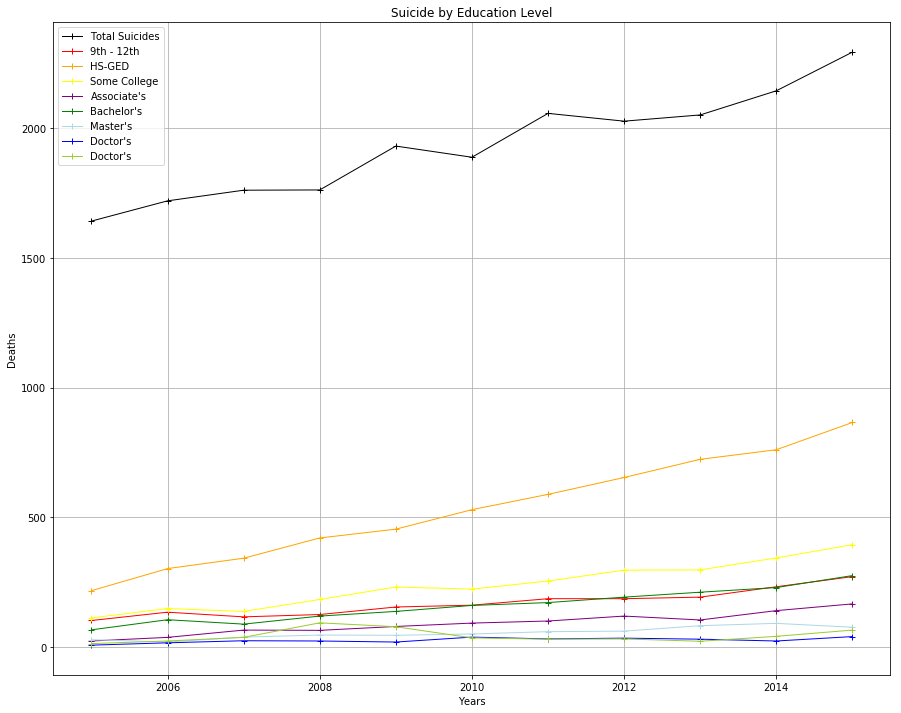

In [94]:
# Create a handle for each plot
plt.figure(figsize=(15,12))
edu, = plt.plot(edu_x_axis, points_ed_tot, marker="+",color="black", linewidth=1, label="Total Suicides")
nine12, = plt.plot(edu_x_axis, points_9_12, marker="+",color="red", linewidth=1, label="9th - 12th")
hsged, = plt.plot(edu_x_axis, points_hs_ged, marker="+",color="orange", linewidth=1, label="HS-GED")
some, = plt.plot(edu_x_axis, points_some, marker="+",color="yellow", linewidth=1, label="Some College")
associate, = plt.plot(edu_x_axis, points_associate, marker="+",color="purple", linewidth=1, label="Associate's")
bachelor, = plt.plot(edu_x_axis, points_bachelor, marker="+",color="green", linewidth=1, label="Bachelor's")
master, = plt.plot(edu_x_axis, points_master, marker="+",color="lightblue", linewidth=1, label="Master's")
doctor, = plt.plot(edu_x_axis, points_doctor, marker="+",color="blue", linewidth=1, label="Doctor's")
unknown, = plt.plot(edu_x_axis, points_unknown, marker="+",color="yellowgreen", linewidth=1, label="Doctor's")
plt.legend(handles=[edu, nine12, hsged, some, associate, bachelor, master, doctor, unknown], loc="best")
# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.title("Suicide by Education Level")
plt.grid()

In [95]:
points_ed_tot

current_data_year
2005    1642
2006    1720
2007    1761
2008    1762
2009    1931
2010    1888
2011    2057
2012    2027
2013    2051
2014    2144
2015    2293
Name: 113_cause_recode, dtype: int64

In [96]:
# checking edu_x_axis w Gerrit
edu_x_axis

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [97]:
# main suicide edu file - from In[58] merge5_df[merge5_df["manner_of_death"]==2]
filter_suicide_ed.head(1)

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,race_recode_3,race_recode_5,resident_status,sex,cause_group,place,marital,month,disposition,education
20,20,126,NaN,NaN,NaN,3322213,3322213.0,9.0,NaN,NaN,...,NaN,2,1,M,1 Intentional self-harm (suicide) by other and...,Decedent’s home,"Never married, single",February,Cremation,8th grade or less


In [98]:
# display column headers
filter_suicide_ed.columns

Index(['Unnamed: 0', '113_cause_recode', '130_infant_cause_recode',
       '358_cause_recode', '39_cause_recode', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'activity_code', 'age_recode_12', 'age_recode_27', 'age_recode_52',
       'autopsy', 'current_data_year', 'day_of_week_of_death', 'detail_age',
       'detail_age_type', 'education_2003_revision', 'hispanic_origin',
       'hispanic_originrace_recode', 'icd_code_10th_revision',
       'infant_age_recode_22', 'injury_at_work', 'manner_of_death',
       'marital_status', 'method_of_disposition', 'month_of_death',
       'place_of_death_and_decedents_status', 'race_recode_3', 'race_recode_5',
       'resident_status', 'sex', 'cause_group', 'place', 'marital', 'month',
       'disposition', 'education'],
      dtype='object')

In [99]:
# verify total number of suicides
total_suicide = filter_suicide_ed["education_2003_revision"].count()
total_suicide

15163

In [100]:
# calculate suicide totals by edu class
edu_suicide_totals = filter_suicide_ed["education_2003_revision"].value_counts()
edu_suicide_totals

3.0    5864
4.0    2629
2.0    1870
6.0    1764
5.0    1000
1.0     655
7.0     606
9.0     479
8.0     296
Name: education_2003_revision, dtype: int64

In [101]:
# calculate percentages based on total pool of deaths by edu class
grade_8_percent = (total_grade8_deaths_year/total_suicide)*100
grade_9_12_percent = (total_9_12_deaths_year/total_suicide)*100
hs_ged_percent = (total_hs_ged_year/total_suicide)*100
some_coll_percent = (total_some_coll_year/total_suicide)*100
associate_percent = (total_associate_year/total_suicide)*100
bachelor_percent = (total_bachelor_year/total_suicide)*100
master_percent = (total_master_year/total_suicide)*100
doctor_percent = (total_doctor_year/total_suicide)*100
unknown_percent = (total_unknown_year/total_suicide)*100

In [102]:
# validate the last calculation from variables above
unknown_percent

current_data_year
2005    0.092330
2006    0.158280
2007    0.250610
2008    0.619930
2009    0.521005
2010    0.237420
2011    0.204445
2012    0.211040
2013    0.151685
2014    0.276990
2015    0.435270
Name: education_2003_revision, dtype: float64

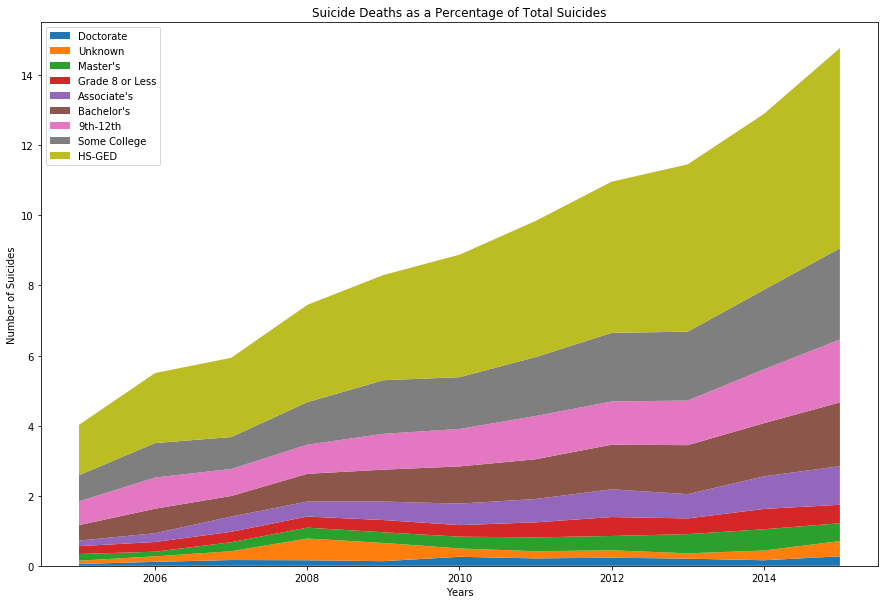

In [103]:
# re-do of In[95] plt.plot with Seth's stacked plot
labels = ["Doctorate","Unknown","Master's","Grade 8 or Less","Associate's","Bachelor's","9th-12th","Some College","HS-GED"]
plt.figure(figsize=(15,10))
plt.stackplot(edu_x_axis, doctor_percent,unknown_percent,master_percent,grade_8_percent,associate_percent,bachelor_percent,grade_9_12_percent,some_coll_percent,hs_ged_percent, labels=labels)
plt.xlabel("Years")
plt.ylabel("Number of Suicides")
plt.title("Suicide Deaths as a Percentage of Total Suicides")
plt.legend(loc='upper left')
plt.show()

In [104]:
# check cause_df columns
cause_df.columns

Index(['manner_of_death', 'cause_of_death'], dtype='object')

In [105]:
# display total pool of deaths by edu class
total_edu_pool = merge1_df["education_2003_revision"].value_counts()
total_edu_pool

3.0    400500
1.0    123319
4.0    116041
2.0    110461
6.0     91733
5.0     50868
7.0     34977
9.0     33569
8.0     15359
Name: education_2003_revision, dtype: int64

In [106]:
# calculate percent of suicides by total pool of death methods
ed_suicide_percent = (edu_suicide_totals/total_edu_pool)*100
ed_suicide_percent

1.0    0.531143
2.0    1.692905
3.0    1.464170
4.0    2.265579
5.0    1.965872
6.0    1.922972
7.0    1.732567
8.0    1.927209
9.0    1.426912
Name: education_2003_revision, dtype: float64

## calculate total pool of edu deaths by year

In [107]:
# calculate edu totals by year for 8th grade or less Code: 1
filter_total_pool_8th = merge8_df[merge8_df["education_2003_revision"]==1]

In [108]:
# groupby 8th grade or less by data year
gb_tot_pool_8th_yr = filter_total_pool_8th.groupby("current_data_year")

In [109]:
# number of 8th grade or less deaths per year (total below matches edu yearly total)
grade8_total_pool_year = gb_tot_pool_8th_yr["education_2003_revision"].count()

In [110]:
# calculate edu totals by year for 9th-12th Code: 2
filter_total_pool_9th = merge8_df[merge8_df["education_2003_revision"]==2]

In [111]:
# groupby 9th-12th by data year
gb_tot_pool_9th_yr = filter_total_pool_9th.groupby("current_data_year")

In [112]:
# number of 9th-12th deaths per year
grade912_total_pool_year = gb_tot_pool_9th_yr["education_2003_revision"].count()

In [113]:
# calculate edu totals by year for HS-GED Code: 3
filter_total_pool_hs = merge8_df[merge8_df["education_2003_revision"]==3]

In [114]:
# groupby HS-GED by data year
gb_tot_pool_hs_yr = filter_total_pool_hs.groupby("current_data_year")

In [115]:
# number of HS-GED deaths per year
hs_total_pool_year = gb_tot_pool_hs_yr["education_2003_revision"].count()

In [116]:
# calculate edu totals by year for Some Coll Code: 4
filter_total_pool_som = merge8_df[merge8_df["education_2003_revision"]==4]

In [117]:
# groupby Some Coll by data year
gb_tot_pool_som_yr = filter_total_pool_som.groupby("current_data_year")

In [118]:
# number of Some Coll deaths per year
som_total_pool_year = gb_tot_pool_som_yr["education_2003_revision"].count()

In [119]:
# calculate edu totals by year for Assoc Code: 5
filter_total_pool_as = merge8_df[merge8_df["education_2003_revision"]==5]

In [120]:
# groupby Assoc by data year
gb_tot_pool_as_yr = filter_total_pool_as.groupby("current_data_year")

In [121]:
# number of Assoc deaths per year
as_total_pool_year = gb_tot_pool_as_yr["education_2003_revision"].count()

In [122]:
# calculate edu totals by year for BA Code: 6
filter_total_pool_ba = merge8_df[merge8_df["education_2003_revision"]==6]

In [123]:
# groupby BA by data year
gb_tot_pool_ba_yr = filter_total_pool_ba.groupby("current_data_year")

In [124]:
# number of BA deaths per year
ba_total_pool_year = gb_tot_pool_ba_yr["education_2003_revision"].count()

In [125]:
# calculate edu totals by year for MA Code: 7
filter_total_pool_ma = merge8_df[merge8_df["education_2003_revision"]==7]

In [126]:
# groupby MA by data year
gb_tot_pool_ma_yr = filter_total_pool_ma.groupby("current_data_year")

In [127]:
# number of MA deaths per year
ma_total_pool_year = gb_tot_pool_ma_yr["education_2003_revision"].count()

In [128]:
# calculate edu totals by year for DR Code: 8
filter_total_pool_dr = merge8_df[merge8_df["education_2003_revision"]==8]

In [129]:
# groupby DR by data year
gb_tot_pool_dr_yr = filter_total_pool_dr.groupby("current_data_year")

In [130]:
# number of DR deaths per year
dr_total_pool_year = gb_tot_pool_dr_yr["education_2003_revision"].count()

In [131]:
# calculate edu totals by year for Unknown Code: 9
filter_total_pool_uk = merge8_df[merge8_df["education_2003_revision"]==9]

In [132]:
# groupby Unknown by data year
gb_tot_pool_uk_yr = filter_total_pool_uk.groupby("current_data_year")

In [133]:
# number of DR deaths per year
uk_total_pool_year = gb_tot_pool_uk_yr["education_2003_revision"].count()

## calculate suicide edu cat % by year against total pool of deaths by edu class 

In [134]:
g8_per = (total_grade8_deaths_year/grade8_total_pool_year)*100
g912_per = (total_9_12_deaths_year/grade912_total_pool_year)*100
hs_per = (total_hs_ged_year/hs_total_pool_year)*100
som_per = (total_some_coll_year/som_total_pool_year)*100
as_per = (total_associate_year/as_total_pool_year)*100
ba_per = (total_bachelor_year/ba_total_pool_year)*100
ma_per = (total_master_year/ma_total_pool_year)*100
dr_per = (total_doctor_year/dr_total_pool_year)*100
uk_per = (total_unknown_year/uk_total_pool_year)*100

<Figure size 1080x720 with 0 Axes>

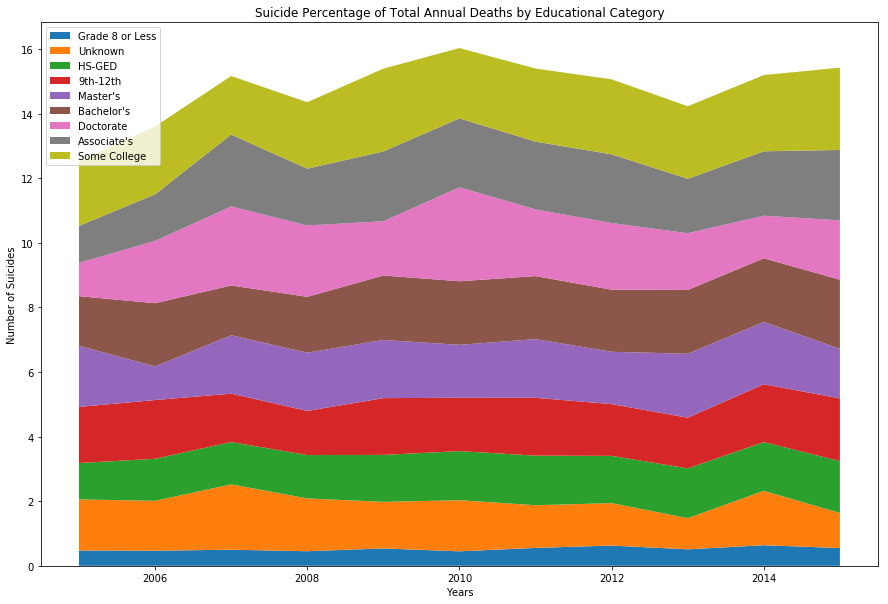

In [135]:
# re-do of In[95] plt.plot with Seth's stacked plot
labels = ["Grade 8 or Less","Unknown","HS-GED","9th-12th","Master's","Bachelor's","Doctorate","Associate's","Some College"]
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))
plt.stackplot(edu_x_axis, g8_per,uk_per,hs_per,g912_per,ma_per,ba_per,dr_per,as_per,som_per, labels=labels)
plt.xlabel("Years")
plt.ylabel("Number of Suicides")
plt.title("Suicide Percentage of Total Annual Deaths by Educational Category")
plt.legend(loc='upper left')
plt.show()

## Line Chart for Suicide Deaths, Doctorate vs. Some College Edu Categories

In [136]:
# assign additional edu totals to y-axis variables
points_some_coll = som_per
points_dr = dr_per

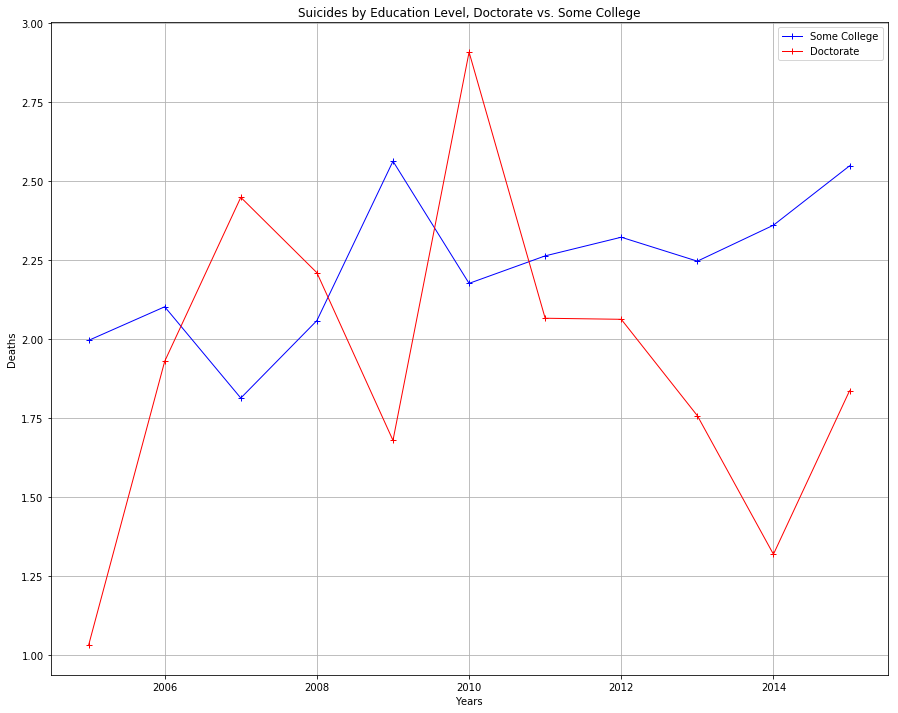

In [137]:
# Create a handle for each plot
plt.figure(figsize=(15,12))
some, = plt.plot(edu_x_axis, points_some_coll, marker="+",color="blue", linewidth=1, label="Some College")
dr,= plt.plot(edu_x_axis, points_dr, marker="+",color="red", linewidth=1, label="Doctorate")
plt.legend(handles=[some, dr], loc="best")
# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.title("Suicides by Education Level, Doctorate vs. Some College")
plt.grid()

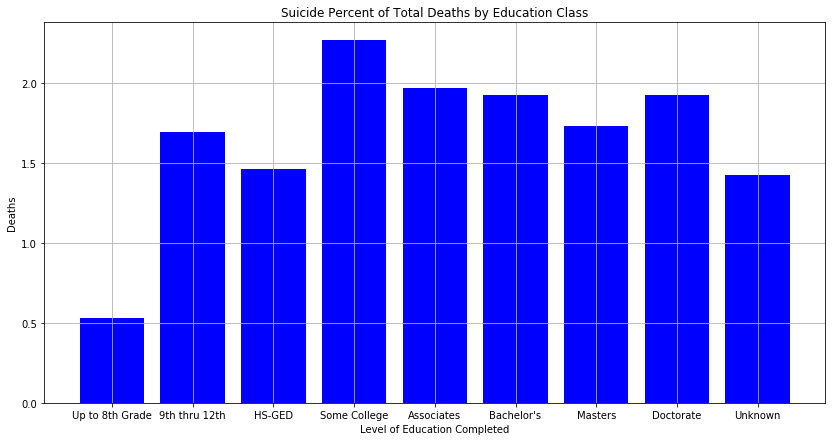

In [138]:
# suicide by education bar chart
plt.figure(figsize=(14,7))
education = ["Up to 8th Grade","9th thru 12th","HS-GED","Some College","Associates","Bachelor's","Masters","Doctorate","Unknown"]
x_axis = np.arange(len(suicide_ed_count))
plt.bar(x_axis,ed_suicide_percent, color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,education)
plt.title("Suicide Percent of Total Deaths by Education Class")
plt.xlabel("Level of Education Completed")
plt.ylabel("Deaths")
plt.grid()

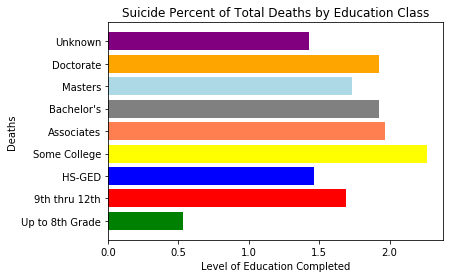

In [139]:
# suicide by education bar chart
fig, ax = plt.subplots()
colors=("green","red","blue","yellow","coral","grey","lightblue","orange","purple")
education = ("Up to 8th Grade","9th thru 12th","HS-GED","Some College","Associates","Bachelor's","Masters","Doctorate","Unknown")
y_pos = np.arange(len(education))
plt.barh(y_pos,ed_suicide_percent, color=colors,align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(education)
plt.title("Suicide Percent of Total Deaths by Education Class")
plt.xlabel("Level of Education Completed")
plt.ylabel("Deaths")
plt.show()

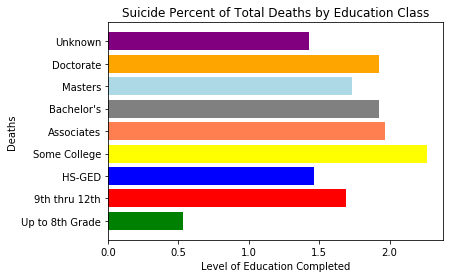

In [140]:
# suicide by education bar chart
fig, ax = plt.subplots()
colors=("green","red","blue","yellow","coral","grey","lightblue","orange","purple")
education = ("Up to 8th Grade","9th thru 12th","HS-GED","Some College","Associates","Bachelor's","Masters","Doctorate","Unknown")
y_pos = np.arange(len(education))
plt.barh(y_pos,ed_suicide_percent, color=colors,align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(education)
plt.title("Suicide Percent of Total Deaths by Education Class")
plt.xlabel("Level of Education Completed")
plt.ylabel("Deaths")
plt.show()

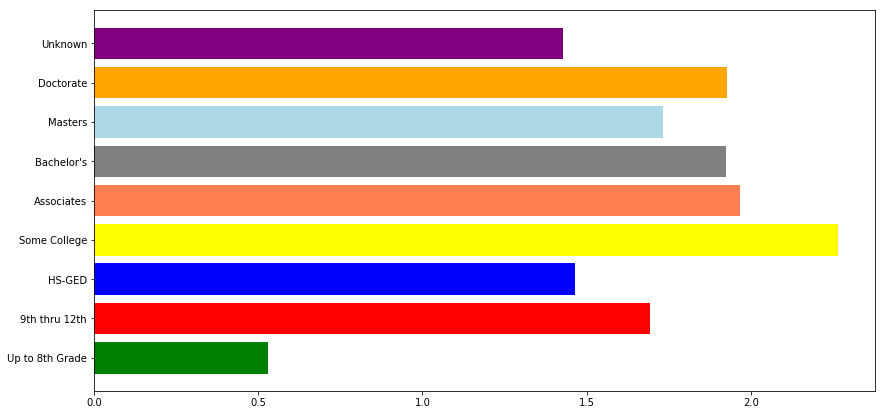

In [141]:
# horizonal bar chart
plt.figure(figsize=(14,7))
percent = ed_suicide_percent
bars = ("Up to 8th Grade","9th thru 12th","HS-GED","Some College","Associates","Bachelor's","Masters","Doctorate","Unknown")
colors=("green","red","blue","yellow","coral","grey","lightblue","orange","purple")
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, percent,color=colors)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()